In [1]:
# redes de multiplas camadas

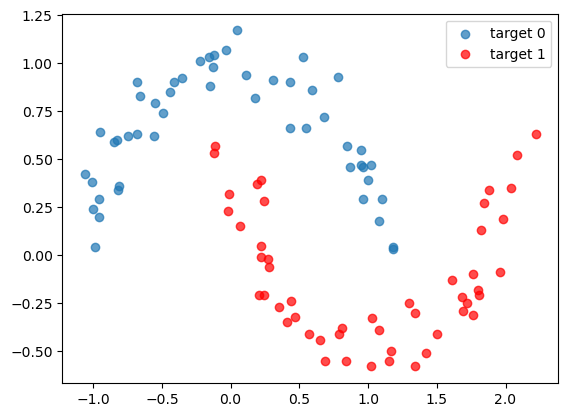

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
import util 

# dados tem 2 variaveis independentes de entrada
data = torch.from_numpy(np.loadtxt('../data/moon_data.txt'))

# dados estao no formato n linhas de dados x 3 colunas (2 inicias input e a final target)
inputs = data[:, :2]
targets = data[:, 2]

# plota duas classes diferentes
plt.scatter(inputs[targets==0, 0], inputs[targets==0, 1], alpha=0.7) # imprime pontos (x1, x2) em que target = 0
plt.scatter(inputs[targets==1, 0], inputs[targets==1, 1], alpha=0.7, c='r') # imprime pontos (x1, x2) em que target = 1
plt.legend(('target 0', 'target 1'))

In [4]:
# treinamento de um modelo linear

def train(model, x, targets, num_epochs, lr, loss_func):

    # x1 e x2
    x = torch.reshape(len(x), 2)
    targets = torch.reshape(len(x), 1)

    losses = []
    # SGD = Stochastic Gradient Descent
    optim = torch.optim.SGD(model.parameters(), lr=lr)
    for _ in range(num_epochs):
        optim.zero_grad()
        scores = model(x)
        loss = loss_func(scores, targets)
        loss.backward()
        optim.step()
        losses.append(loss)

    return losses

loss_func = nn.BCEWithLogitsLoss()
model = nn.Linear(in_features=2, out_features=1, bias=True)
losses = train(model, inputs, targets, num_epochs=100, lr=0.5, loss_func=loss_func)
plt.plot(losses)

TypeError: train() missing 1 required positional argument: 'loss_func'

In [ ]:
# modelo linear tem capacidade de separar dados de forma linear apenas